In [1]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [2]:
# Data Collection and Load
df = pd.read_csv(r"C:\Users\Home\Downloads\archive (1)\loan_sanction_train.csv")

In [3]:
# 2. Data Show and Store

print(df.head())
df.to_csv("Stored_Loan_Data.csv", index=False)

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount Loan_Amount_Term  \
0             5849                0.0         NaN              360   
1             4583             1508.0       128.0                    
2             3000                0.0        66.0              360   
3             2583             2358.0       120.0              360   
4             6000                0.0       141.0              360   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         

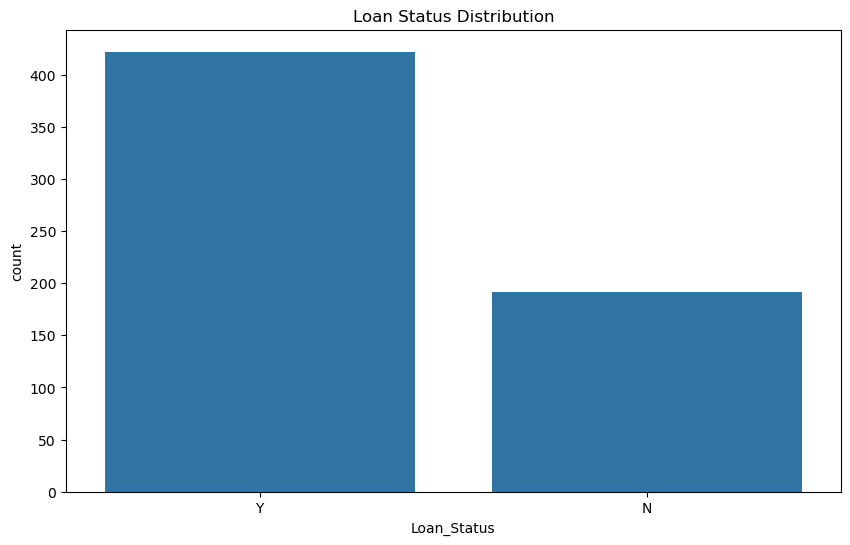

In [4]:
# 3. Data Visualization

plt.figure(figsize=(10, 6))
sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Status Distribution")
plt.show()

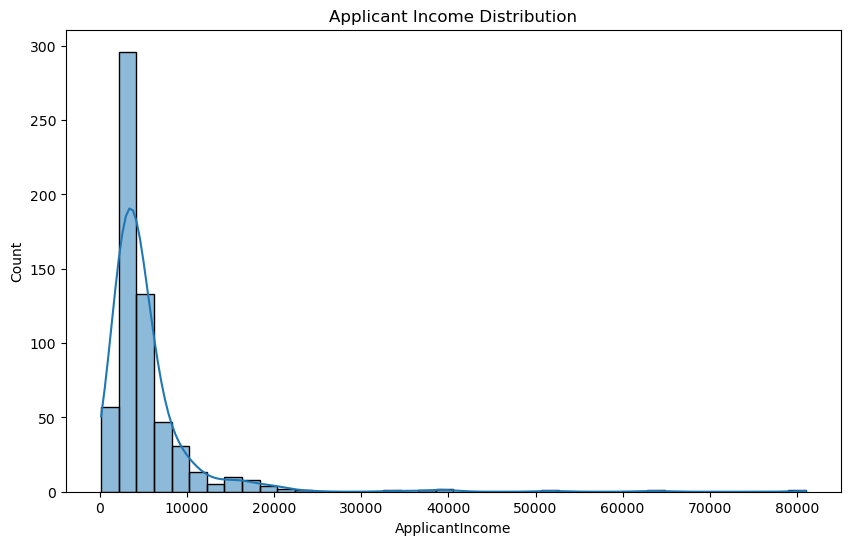

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ApplicantIncome'], bins=40, kde=True)
plt.title("Applicant Income Distribution")
plt.show()

In [6]:
# Data cleaning 

In [7]:
df = df.drop_duplicates() # Remove duplicates
df.isnull().sum() # Finding the null no. of null value rows of columns or Missing values


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Correct and safe way (no warning)
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])               # Fill 'Gender' with most frequent value
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])           # Fill 'Married' with most frequent value
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])  #  Fill 'Dependents' with most frequent value
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0]) # Fill 'Self_Employed' with most frequent value

# Fill numerical columns using median or mode (Step 3: Handle Missing Numerical Data)
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())    # Fill 'LoanAmount' with median (skewed data)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0]) # Fill 'Loan_Amount_Term' with mode (standard terms)
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])       # Fill 'Credit_History' with mode (1 = has history)



# Replace empty strings with NaN
df.replace(' ', np.nan, inplace=True)

# Safely fill missing values (no chained assignment)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())




In [9]:
# df.dropna(inplace=True)

In [10]:
# After cleaning  check the null columns
print(df.isnull().sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [11]:

df.drop(['Loan_ID'], axis=1, inplace=True) # Drop Loan_Id

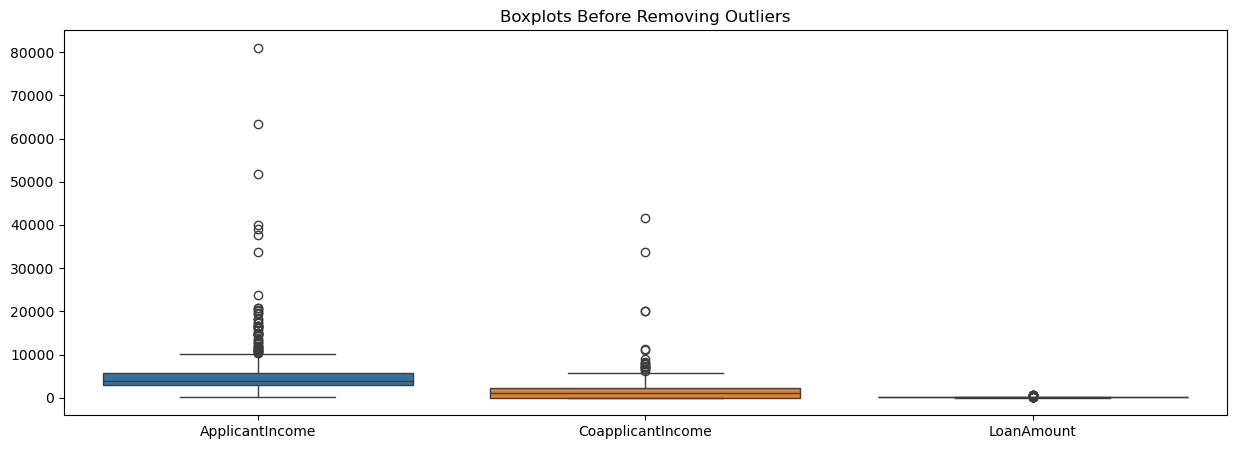

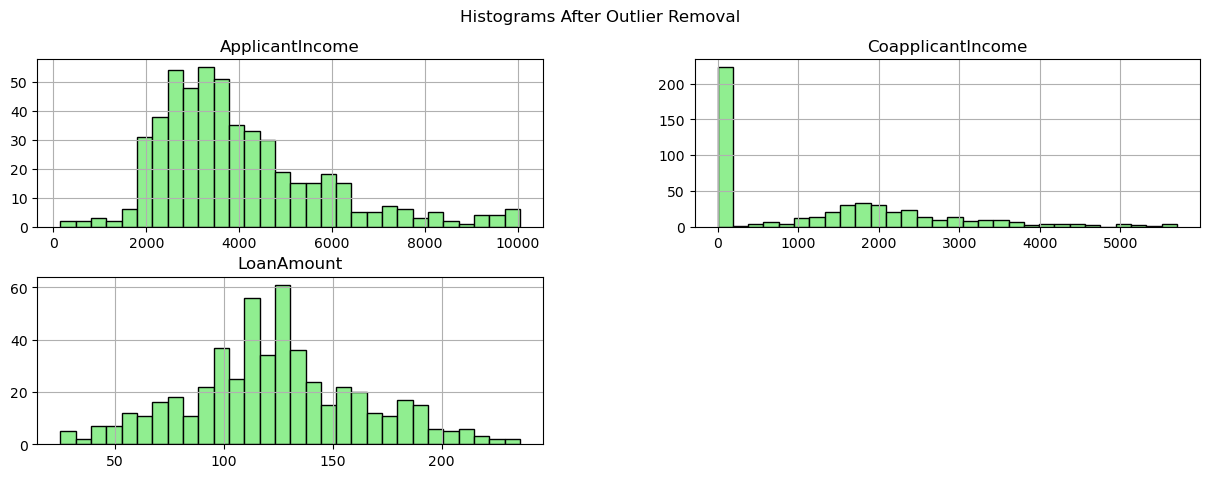

In [12]:
# Step: Visualize initial boxplots (Before removing outliers)
plt.figure(figsize=(15, 5))
sns.boxplot(data=df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])
plt.title("Boxplots Before Removing Outliers")
plt.show()

# Step: Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Step: Remove outliers from each target column
df = remove_outliers_iqr(df, 'ApplicantIncome')      # Remove outliers from ApplicantIncome
df = remove_outliers_iqr(df, 'CoapplicantIncome')    # Remove outliers from CoapplicantIncome
df = remove_outliers_iqr(df, 'LoanAmount')           # Remove outliers from LoanAmount

# Step: Visualize histograms (After removing outliers)
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].hist(
    bins=30, figsize=(15, 5), color='lightgreen', edgecolor='black'
)
plt.suptitle("Histograms After Outlier Removal")
plt.show()

In [13]:
# # --------------------  Data Type Conversion --------------------
# # Convert Credit_History to integer if it's float
# df['Credit_History'] = df['Credit_History'].astype(int)

# # -------------------- Encode Categorical Data --------------------

# # Binary Label Encoding
# df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
# df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
# df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
# df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
# df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})  # Target variable

# # One-hot encoding for multi-category columns
# df = pd.get_dummies(df, columns=['Dependents', 'Property_Area'], drop_first=True)


# # Encode categorical columns
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# for col in df.columns:
#     if df[col].dtype == 'object':
#         df[col] = le.fit_transform(df[col])

df['Credit_History'] = df['Credit_History'].astype(int)

# -------------------- 2. Encode Categorical Data --------------------

# Binary Label Encoding
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})  # Target variable

# One-hot encoding for multi-category columns
df = pd.get_dummies(df, columns=['Dependents', 'Property_Area'], drop_first=True)

In [14]:
# -------------------- Data Splitting --------------------

# Separate features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split before normalization to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Normalize 

# Columns to normalize
cols_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Create and fit the scaler only on training data
scaler = StandardScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

# Transform the test data using the same scaler
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

#Final Check 

print("✅ First 5 rows of training data:")
print(X_train.head())

print("\n🧬 Data types:")
print(X_train.dtypes)

print("\n✅ Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

✅ First 5 rows of training data:
     Gender  Married  Education  Self_Employed  ApplicantIncome  \
508       1        1          1              1        -0.831310   
512       1        1          1              0        -0.379179   
245       1        0          1              1         1.176848   
388       1        1          1              0        -0.913413   
262       0        0          1              0        -0.267834   

     CoapplicantIncome  LoanAmount Loan_Amount_Term  Credit_History  \
508           1.157410    1.638810              360               1   
512           0.461880    0.607932              360               1   
245           2.096163   -0.113681              180               1   
388           0.733549    0.298669              360               1   
262          -0.985364    0.788336               36               1   

     Dependents_1  Dependents_2  Dependents_3+  Property_Area_Semiurban  \
508         False         False          False                

In [16]:
#Show Scaled Data After Normalization

# 1. First 5 rows of scaled numerical columns from training set
print(" Scaled Data (Training Set - First 5 Rows):")
print(X_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].head())

# 2. Summary statistics of scaled numerical columns (training set)
print("\n Summary of Scaled Features (Training Set):")
print(X_train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].describe())

# 3. First 5 rows of scaled numerical columns from testing set
print("\n Scaled Data (Testing Set - First 5 Rows):")
print(X_test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].head())

# 4. Summary statistics of scaled numerical columns (testing set)
print("\n Summary of Scaled Features (Testing Set):")
print(X_test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].describe())


 Scaled Data (Training Set - First 5 Rows):
     ApplicantIncome  CoapplicantIncome  LoanAmount
508        -0.831310           1.157410    1.638810
512        -0.379179           0.461880    0.607932
245         1.176848           2.096163   -0.113681
388        -0.913413           0.733549    0.298669
262        -0.267834          -0.985364    0.788336

 Summary of Scaled Features (Training Set):
       ApplicantIncome  CoapplicantIncome    LoanAmount
count     4.160000e+02       4.160000e+02  4.160000e+02
mean     -7.472655e-17      -4.270089e-18 -2.989062e-17
std       1.001204e+00       1.001204e+00  1.001204e+00
min      -2.141027e+00      -9.853636e-01 -2.562015e+00
25%      -6.987356e-01      -9.853636e-01 -6.291200e-01
50%      -2.236889e-01       4.513076e-02 -3.636568e-02
75%       4.135962e-01       6.153163e-01  6.401474e-01
max       3.424568e+00       3.069052e+00  2.875862e+00

 Scaled Data (Testing Set - First 5 Rows):
     ApplicantIncome  CoapplicantIncome  LoanAmount

In [17]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
print("\n✅ Model Trained")

# Then predict
y_pred = model.predict(X_test)



✅ Model Trained


In [18]:
# 11. Model Showing (Evaluation)
print("\n✅ Model Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))    


✅ Model Evaluation:
Accuracy Score: 0.8173076923076923

Confusion Matrix:
 [[20 14]
 [ 5 65]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.59      0.68        34
           1       0.82      0.93      0.87        70

    accuracy                           0.82       104
   macro avg       0.81      0.76      0.78       104
weighted avg       0.82      0.82      0.81       104



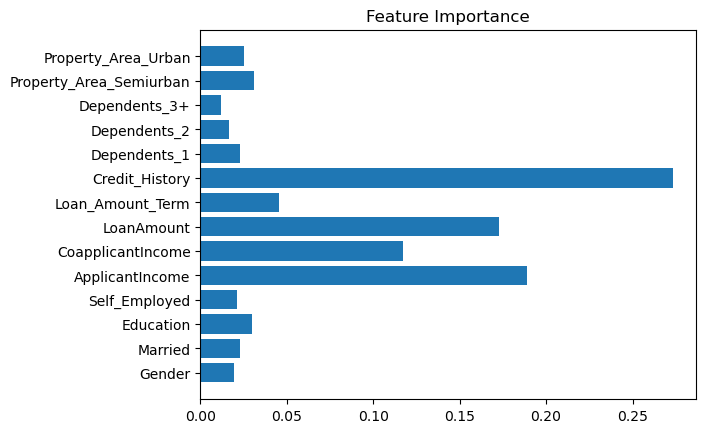

In [19]:
importances = model.feature_importances_
features = X.columns
plt.barh(features, importances)
plt.title("Feature Importance")
plt.show()

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -------------------- 1. Create and Train the Model --------------------
dt_model = DecisionTreeClassifier(random_state=42)  # You can add max_depth, criterion, etc.
dt_model.fit(X_train, y_train)

# -------------------- 2. Make Predictions --------------------
y_pred_dt = dt_model.predict(X_test)

# -------------------- 3. Evaluate the Model --------------------

# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"✅ Decision Tree Accuracy: {accuracy_dt:.4f}")

# Confusion Matrix
print("\n🧮 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=["Not Approved", "Approved"]))


✅ Decision Tree Accuracy: 0.7596

🧮 Confusion Matrix:
[[19 15]
 [10 60]]

📋 Classification Report:
              precision    recall  f1-score   support

Not Approved       0.66      0.56      0.60        34
    Approved       0.80      0.86      0.83        70

    accuracy                           0.76       104
   macro avg       0.73      0.71      0.72       104
weighted avg       0.75      0.76      0.75       104



In [21]:
# pip install lightgbm


In [22]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -------------------- Step 1: Ensure data types are correct --------------------
# Convert any object-type columns (especially 'Loan_Amount_Term') to float
X_train['Loan_Amount_Term'] = pd.to_numeric(X_train['Loan_Amount_Term'], errors='coerce')
X_test['Loan_Amount_Term'] = pd.to_numeric(X_test['Loan_Amount_Term'], errors='coerce')

# -------------------- Step 2: Initialize the LightGBM model --------------------
lgb_model = LGBMClassifier(
    objective='binary',
    n_estimators=100,
    learning_rate=0.1,
    num_leaves=31,
    random_state=42,
    n_jobs=-1
)

# -------------------- Step 3: Train the model --------------------
lgb_model.fit(X_train, y_train)

# -------------------- Step 4: Predict on test data --------------------
y_pred_lgb = lgb_model.predict(X_test)

# -------------------- Step 5: Evaluate the model --------------------
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)

print(f"✅ LightGBM Model Accuracy: {accuracy_lgb:.4f}\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lgb)
print("🧮 Confusion Matrix:")
print(cm)

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_lgb, target_names=["Not Approved", "Approved"]))


[LightGBM] [Info] Number of positive: 292, number of negative: 124
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 416, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.701923 -> initscore=0.856472
[LightGBM] [Info] Start training from score 0.856472
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [31]:


print("🔷 Enter loan applicant details below:")

gender = int(input("Gender (Male=1, Female=0): "))
married = int(input("Married? (Yes=1, No=0): "))
education = int(input("Education (Graduate=1, Not Graduate=0): "))
self_employed = int(input("Self-Employed? (Yes=1, No=0): "))
applicant_income = float(input("Applicant Income: "))
coapplicant_income = float(input("Coapplicant Income: "))
loan_amount = float(input("Loan Amount (in thousands): "))
loan_amount_term = float(input("Loan Amount Term (in months): "))
credit_history = int(input("Credit History (1 = Has history, 0 = No history): "))

# ➤ One-hot encoding for Dependents
print("Dependents: Enter 0, 1, 2, or 3+")
dep_input = input("Dependents: ")
dependents_1 = 1 if dep_input == '1' else 0
dependents_2 = 1 if dep_input == '2' else 0
dependents_3_plus = 1 if dep_input in ['3', '3+'] else 0

# ➤ One-hot encoding for Property_Area
print("Property Area Options: Rural, Semiurban, Urban")
prop_input = input("Enter Property Area: ").lower()
property_area_semiurban = 1 if prop_input == 'semiurban' else 0
property_area_urban = 1 if prop_input == 'urban' else 0

# 🔹 Create DataFrame from input
user_input_df = pd.DataFrame([{
    'Gender': gender,
    'Married': married,
    'Education': education,
    'Self_Employed': self_employed,
    'ApplicantIncome': applicant_income,
    'CoapplicantIncome': coapplicant_income,
    'LoanAmount': loan_amount,
    'Loan_Amount_Term': loan_amount_term,
    'Credit_History': credit_history,
    'Dependents_1': dependents_1,
    'Dependents_2': dependents_2,
    'Dependents_3+': dependents_3_plus,
    'Property_Area_Semiurban': property_area_semiurban,
    'Property_Area_Urban': property_area_urban
}])

# 🔹 Scale numerical features
user_input_df[cols_to_scale] = scaler.transform(user_input_df[cols_to_scale])

# 🎯 Predict
result = model.predict(user_input_df)[0]

# ✅ Output Result
print("\n🎯 Prediction Result:")
if result == 1:
    print("✅ Loan Approved")
else:
    print("❌ Loan Not Approved")

🔷 Enter loan applicant details below:


Gender (Male=1, Female=0):  1
Married? (Yes=1, No=0):  1
Education (Graduate=1, Not Graduate=0):  1
Self-Employed? (Yes=1, No=0):  1
Applicant Income:  600000
Coapplicant Income:  30000
Loan Amount (in thousands):  70000
Loan Amount Term (in months):  365
Credit History (1 = Has history, 0 = No history):  1


Dependents: Enter 0, 1, 2, or 3+


Dependents:  2


Property Area Options: Rural, Semiurban, Urban


Enter Property Area:  Rural



🎯 Prediction Result:
✅ Loan Approved


In [24]:
!pip install joblib

In [34]:
import joblib

# Save the trained model
joblib.dump(model, 'loan_rf_model.pkl')

print("✅ Model saved as 'loan_rf_model.pkl'")


✅ Model saved as 'loan_rf_model.pkl'


In [35]:
joblib.dump(scaler, 'loan_scaler.pkl')
print("✅ Scaler saved as 'loan_scaler.pkl'")


✅ Scaler saved as 'loan_scaler.pkl'


In [36]:
import os
print(os.listdir())  # Should show loan_rf_model.pkl


['.ipynb_checkpoints', 'clustering', 'LoanApproval.ipynb', 'LoanApproval2.html', 'LoanApproval2.ipynb', 'LoanApproval2_files', 'loanWeb.py', 'loan_rf_model.pkl', 'loan_scaler.pkl', 'Stored_Loan_Data.csv', 'Untitled.ipynb', 'untitled.txt', 'Weapon_Detection_AI', 'Weapon_Detection_AI.zip']
